In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
df = pd.read_csv("../dados/exemplo_03.csv")

In [17]:
X, y = df[["x"]], df[["y"]]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [85]:
mae_train_vals = []
mae_test_vals = []

nodes = range(2,20)

for node in nodes:
    model = DecisionTreeRegressor(max_leaf_nodes=node)
    model.fit(X_train,y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mae_train = mean_absolute_error(y_pred_train, y_train)
    mae_test = mean_absolute_error(y_pred_test, y_test)

    mae_train_vals.append(mae_train)
    mae_test_vals.append(mae_test)


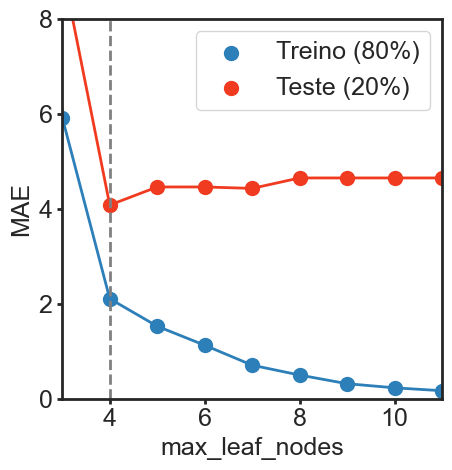

In [86]:
import seaborn as sns
sns.set_style("ticks")

plt.plot(nodes, mae_train_vals, color='#2c7fb8',linestyle='-', linewidth=2)
plt.plot(nodes, mae_test_vals, color='#f03b20',linestyle='-', linewidth=2)
plt.scatter(nodes, mae_train_vals, color='#2c7fb8', label="Treino (80%)", s=100)
plt.scatter(nodes, mae_test_vals, color='#f03b20', label="Teste (20%)", s=100)
plt.plot(4*np.ones(100),np.linspace(0,8, 100), color="grey", linestyle="--", linewidth=2)
plt.ylim(0,8)
plt.xlim(3,11)
plt.xlabel("max_leaf_nodes", fontsize=18)  
plt.ylabel('MAE', fontsize=18)
# plt.xticks([1,3,5,7,9,11,13])
plt.tick_params(axis='both', which='major', labelsize=18, width=2)
plt.legend(loc="best", fontsize=18)
plt.gca().set_aspect(1)

for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

plt.tight_layout()
plt.show()

# Cross validation

In [105]:
depths = range(2,20)
mae_vals = []
mae_std = []
for depth in depths:
    model = DecisionTreeRegressor(max_leaf_nodes=depth)
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
    mae_vals.append(np.mean(-scores))
    mae_std.append(np.std(-scores))

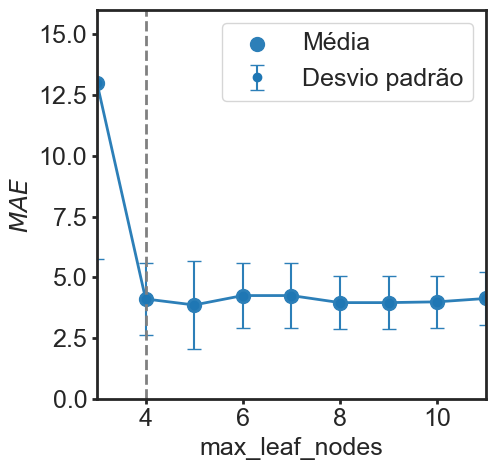

In [111]:
sns.set_style("ticks")

plt.plot(nodes, mae_vals, color='#2c7fb8',linestyle='-', linewidth=2)
plt.scatter(nodes, mae_vals, color='#2c7fb8', s=100, label='Média')
plt.errorbar(nodes, mae_vals, yerr=mae_std, fmt='o', ecolor='#2c7fb8', capsize=5, linestyle='None', label='Desvio padrão')
plt.plot(4*np.ones(100),np.linspace(0,16, 100), color="grey", linestyle="--", linewidth=2)
plt.ylim(0,16)
plt.xlim(3,11)
plt.xlabel("max_leaf_nodes", fontsize=18)  
plt.ylabel('$MAE$', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18, width=2)
plt.legend(loc="best", fontsize=18)
plt.gca().set_aspect(0.5)

for spine in plt.gca().spines.values():
    spine.set_linewidth(2)

plt.tight_layout()
plt.show()

In [112]:
model = DecisionTreeRegressor(max_leaf_nodes=4)
model.fit(X_train,y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_test, y_test)

print(f"MAE (train) = {mae_train:.4f}")
print(f"MAE (test) = {mae_test:.4f}")

MAE (train) = 2.1072
MAE (test) = 4.0803
